### 09. Plot the general statistics.

---
1. Number of days players played the game
* Number of matches played by date
* Histogram of the average kill ratio for players
* Histogram of the average time difference between consecutive kills
* Number of estimated period of cheating
* Number of cheaters by ban date

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as dates

### 1. Count the number of days players played the game (Figure S4-B).

Players accessed the game for 5.7 days on average. The median value is 3. 

In [6]:
days_df = pd.read_csv("data/general_stats/num_of_days.csv")
print(days_df['days'].mean())
print(days_df['days'].median())

5.766681832927859
3.0


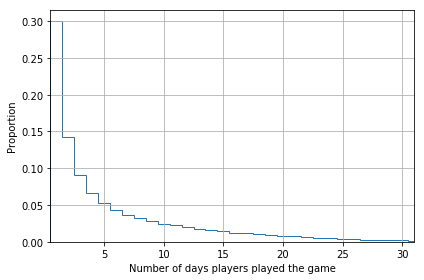

In [9]:
# Plot the distribution of days players played the game.
bins = np.arange(0, days_df['days'].max() + 1.5) - 0.5
fig, ax = plt.subplots()
days_df.hist(ax=ax, column = 'days', histtype='step', 
             weights=np.zeros_like(days_df['days'])+1./len(days_df['days']), 
             bins = bins)
plt.xlim(xmin=0.5)
plt.xlim(xmax=31)
plt.xlabel("Number of days players played the game")
plt.ylabel("Proportion")
plt.title("")
plt.tight_layout()
plt.show()
fig.savefig('figs/general_stats/num_of_days.png')

### 2. Count the number of matches by date (Figure S4-A).

In [2]:
mids_by_date = pd.read_csv("data/general_stats/mids_by_date.csv")
mids_by_date['m_date'] = pd.to_datetime(mids_by_date['m_date'], format='%Y-%m-%d')
mids_by_date['day'] = mids_by_date['m_date'].dt.dayofweek
days = {0:'M', 1:'T', 2:'W', 3:'T', 4:'F', 5:'S', 6:'S'}
mids_by_date['day'] = mids_by_date['day'].apply(lambda x: days[x])
mids_by_date = mids_by_date.sort_values(['m_date'])
mids_by_date.set_index(['m_date'], inplace=True)
print(mids_by_date)

            num_of_mids day
m_date                     
2019-03-01        48886   F
2019-03-02        48995   S
2019-03-03        45696   S
2019-03-04        33555   M
2019-03-05        30504   T
2019-03-06        30434   W
2019-03-07        31267   T
2019-03-08        36469   F
2019-03-09        50479   S
2019-03-10        46290   S
2019-03-11        29363   M
2019-03-12        29157   T
2019-03-13        29009   W
2019-03-14        29890   T
2019-03-15        37090   F
2019-03-16        50550   S
2019-03-17        45816   S
2019-03-18        29833   M
2019-03-19        29523   T
2019-03-20        29240   W
2019-03-21        31193   T
2019-03-22        36154   F
2019-03-23        50375   S
2019-03-24        45624   S
2019-03-25        29115   M
2019-03-26        27491   T
2019-03-27        29446   W
2019-03-28        24271   T
2019-03-29        36189   F
2019-03-30        49550   S
2019-03-31        45487   S


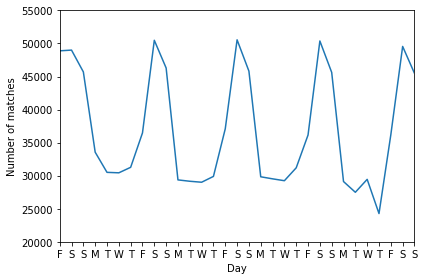

In [6]:
# Plot a line chart.
fig, ax = plt.subplots()
mids_by_date.plot(ax=ax)
plt.xticks(mids_by_date.index, mids_by_date["day"].values)
ax.get_legend().remove()
plt.ylim(ymin=20000, ymax=55000)
plt.xlabel("Day")
plt.ylabel("Number of matches")
plt.tight_layout()
plt.show()
fig.savefig('figs/general_stats/num_of_matches_by_date.png')

In [52]:
# Count the total number of matches.
# The answer should be 1,146,941.
print(mids_by_date['num_of_mids'].sum())

1146941


### 3. Plot a histogram of the average kill ratio for players (Figure S2-A).

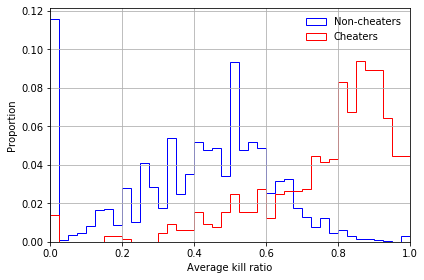

In [11]:
# Read the average kill ratio for cheaters.
c_avg_kill_ratio = pd.read_csv("data/cheater_analysis/c_avg_kill_ratio.csv")

# Read the average kill ratio for non-cheaters.
nc_avg_kill_ratio = pd.read_csv("data/cheater_analysis/nc_avg_kill_ratio.csv")

# Plot the histograms of cheaters and non-cheaters together.
ax = nc_avg_kill_ratio.hist(column='avg_kill_ratio', histtype='step', edgecolor='blue', bins=40, label='Non-cheaters', 
                            weights=np.zeros_like(nc_avg_kill_ratio['avg_kill_ratio'])+1./len(nc_avg_kill_ratio['avg_kill_ratio']))
fig = c_avg_kill_ratio.hist(column='avg_kill_ratio', histtype='step', edgecolor='red', bins=40, label='Cheaters', 
                            weights=np.zeros_like(c_avg_kill_ratio['avg_kill_ratio'])+1./len(c_avg_kill_ratio['avg_kill_ratio']), ax=ax)
plt.title('')
plt.xlim(xmin = 0)
plt.xlim(xmax = 1)
plt.xlabel('Average kill ratio')
plt.ylabel('Proportion')
plt.tight_layout()
plt.legend(loc='upper right', frameon=False)
plt.savefig('figs/general_stats/avg_kill_ratio.png')
plt.show()

### 4. Plot a histogram of the average time difference between consecutive kills (Figure S2-B).

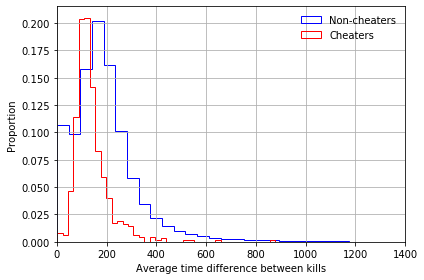

In [12]:
# Read the average kill interval for cheaters.
c_avg_kill_interval = pd.read_csv("data/cheater_analysis/c_avg_kill_interval.csv")

# Read the average kill interval for non-cheaters.
nc_avg_kill_interval = pd.read_csv("data/cheater_analysis/nc_avg_kill_interval.csv")

# Plot the histograms of cheaters and non-cheaters together.
ax = nc_avg_kill_interval.hist(column='delta', histtype='step', edgecolor='blue', bins=40, label='Non-cheaters', 
                               weights=np.zeros_like(nc_avg_kill_interval['delta'])+1./len(nc_avg_kill_interval['delta']))
fig = c_avg_kill_interval.hist(column='delta', histtype='step', edgecolor='red', bins=40, label='Cheaters', 
                               weights=np.zeros_like(c_avg_kill_interval['delta'])+1./len(c_avg_kill_interval['delta']), ax=ax)
plt.title('')
plt.xlabel('Average time difference between kills')
plt.ylabel('Proportion')
plt.xlim(xmin = 0)
plt.xlim(xmax=1400) # Exclude outliers.
plt.legend(loc='upper right', frameon=False)
plt.tight_layout()
plt.savefig('figs/general_stats/avg_kill_interval.png')
plt.show()

### 5. Plot a distribution of estimated period of cheating (Figure S3).

In [3]:
estim = pd.read_csv("data/general_stats/estimated_cheating_time.csv")
print(estim['period'].mean())
print(estim['period'].median())

4.364765100671141
2.0


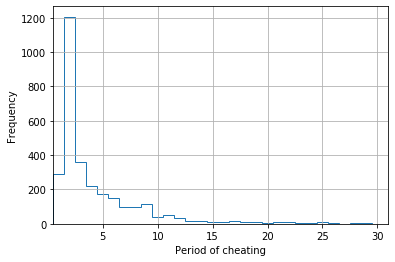

In [6]:
# Plot the distribution of the period of cheating.
# The plot contains cheaters who have full performance information.
bins = np.arange(0, estim['period'].max() + 1.5) - 0.5
fig = estim.hist(bins = bins, histtype='step')
plt.title('')
plt.xlim(xmin = 0.5)
plt.xlim(xmax = 31)
plt.xlabel('Period of cheating')
plt.ylabel('Frequency')
plt.savefig('figs/general_stats/estimated_period_of_cheating.png')
plt.show()

### 6. Count the number of cheaters by ban date.

In [8]:
num_of_cheaters = pd.read_csv("data/general_stats/num_of_cheaters.csv")
num_of_cheaters['ban_date'] = pd.to_datetime(num_of_cheaters['ban_date'], format='%Y-%m-%d')
num_of_cheaters = num_of_cheaters.sort_values(['ban_date'])
num_of_cheaters.set_index(['ban_date'], inplace=True)
print(num_of_cheaters)

            num_of_cheaters
ban_date                   
2019-03-01              103
2019-03-02              290
2019-03-03              258
2019-03-04              312
2019-03-05              228
2019-03-06              702
2019-03-07              262
2019-03-08              145
2019-03-09              690
2019-03-10              135
2019-03-11              511
2019-03-12              324
2019-03-13              188
2019-03-14              139
2019-03-15              132
2019-03-16              107
2019-03-17              144
2019-03-19              116
2019-03-20              112
2019-03-21              105
2019-03-22              118
2019-03-23              176
2019-03-24               99
2019-03-25               89
2019-03-26              170
2019-03-27              111
2019-03-28               99
2019-03-29              114
2019-03-30               93
2019-03-31               89


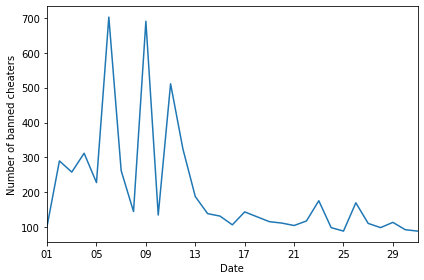

In [17]:
# Plot a line chart.
fig, ax = plt.subplots()
num_of_cheaters.plot(ax=ax)
ax.get_legend().remove()
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))
plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='center')
plt.xlabel("Date")
plt.ylabel("Number of banned cheaters")
plt.tight_layout()
plt.show() 
fig.savefig('figs/general_stats/num_of_cheaters_by_ban_date.png')

In [18]:
# Count the total number of cheaters.
# The answer should be 6,161.
print(num_of_cheaters['num_of_cheaters'].sum())

6161
